In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import geojson
import plotly.express as px
import plotly.io as pio
import json
import seaborn as sns

# Load data

In [3]:
df = pd.read_csv('/u/data/s194333/andersthuesen.github.io/social-data-analysis-final-project/data/yellow_tripdata_combined_cleaned.csv')

In [4]:
print(df.columns)
print(sum(df['trip_distance']<1))

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_at', 'dropoff_at',
       'duration'],
      dtype='object')
499046


In [13]:
df["pickup_at"] = pd.to_datetime(df["pickup_at"])
df["dropoff_at"] = pd.to_datetime(df["dropoff_at"])

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06,2.325625e+06
mean,1.196811e+06,1.701541e+00,1.393804e+00,3.121510e+00,1.041062e+00,1.662738e+02,1.639142e+02,1.206213e+00,1.251715e+01,1.047672e+00,4.983086e-01,2.395816e+00,3.682153e-01,2.999923e-01,1.882312e+01,2.333214e+00,8.320075e-02,7.603614e+02
std,6.902333e+05,4.575821e-01,9.877412e-01,4.060114e+00,2.682464e-01,6.496910e+01,7.059798e+01,4.045850e-01,1.125909e+01,1.240980e+00,2.916780e-02,2.635251e+00,1.638376e+00,1.523777e-03,1.413880e+01,6.238153e-01,3.115744e-01,5.633913e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+00,0.000000e+00,0.000000e+00,6.000000e+01
25%,5.991600e+05,1.000000e+00,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,3.840000e+02
50%,1.196893e+06,2.000000e+00,1.000000e+00,1.750000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,0.000000e+00,6.090000e+02
75%,1.794444e+06,2.000000e+00,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00,0.000000e+00,9.600000e+02
max,2.392427e+06,2.000000e+00,6.000000e+00,9.946000e+01,6.000000e+00,2.650000e+02,2.650000e+02,2.000000e+00,2.500000e+02,3.350000e+01,3.300000e+00,1.111100e+02,8.245000e+01,3.000000e-01,3.318500e+02,2.500000e+00,1.250000e+00,1.077900e+04


In [7]:
#df["VendorID"].plot(kind="bar", title="VendorID", xlabel="VendorID")

In [8]:
#df["passenger_count"].plot(kind="bar", title="passenger_count", xlabel="passenger_count")

# Histograms - frequency of feature

<AxesSubplot:title={'center':'trip_distance'}, ylabel='Frequency'>

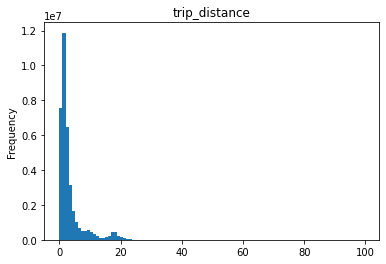

In [14]:
df["trip_distance"].plot(kind="hist", title="trip_distance", xlabel="trip_distance", ylabel="Number of pickups", bins=100)

In [10]:
#df["RatecodeID"].plot(kind="bar", title="RatecodeID", xlabel="RatecodeID")

In [11]:
#df["PULocationID"].plot(kind="bar", title="PULocationID", xlabel="PULocationID")

In [12]:
#df["DOLocationID"].plot(kind="bar", title="DOLocationID", xlabel="DOLocationID")

In [13]:
#df["payment_type"].plot(kind="bar", title="payment_type", xlabel="payment_type")

<AxesSubplot: title={'center': 'fare_amount'}, ylabel='Frequency'>

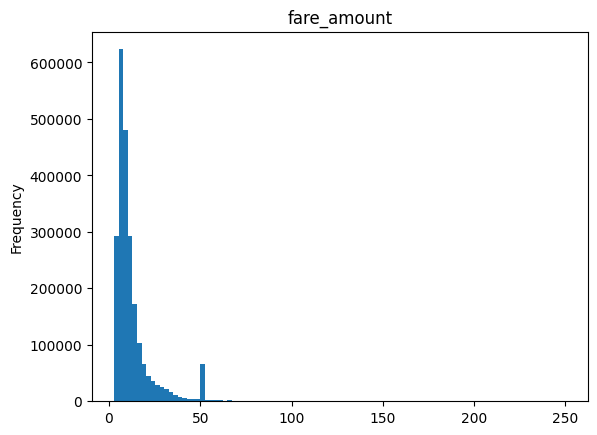

In [14]:
df["fare_amount"].plot(kind="hist", title="fare_amount", xlabel="fare_amount", bins=100)

<AxesSubplot: title={'center': 'extra'}, ylabel='Frequency'>

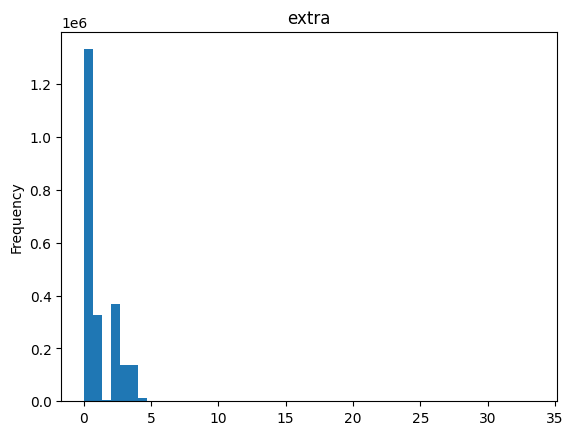

In [15]:
df["extra"].plot(kind="hist", title="extra", xlabel="extra", bins=50)

<AxesSubplot: title={'center': 'mta_tax'}, ylabel='Frequency'>

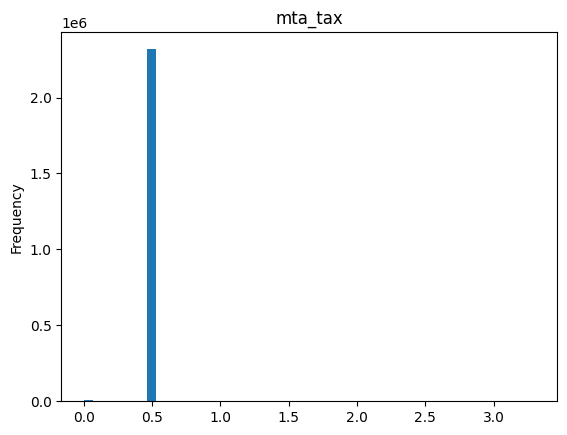

In [16]:
df["mta_tax"].plot(kind="hist", title="mta_tax", xlabel="mta_tax", bins=50)

<AxesSubplot: title={'center': 'tip_amount'}, ylabel='Frequency'>

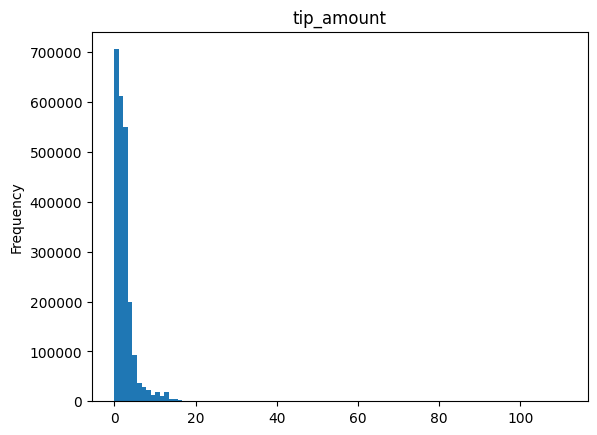

In [17]:
df["tip_amount"].plot(kind="hist", title="tip_amount", xlabel="tip_amount", bins=100)

<AxesSubplot: title={'center': 'tolls_amount'}, ylabel='Frequency'>

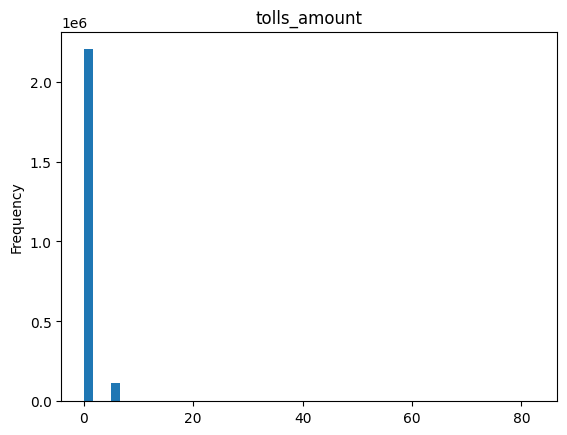

In [18]:
df["tolls_amount"].plot(kind="hist", title="tolls_amount", xlabel="tolls_amount", bins=50)

<AxesSubplot: title={'center': 'improvement_surcharge'}, ylabel='Frequency'>

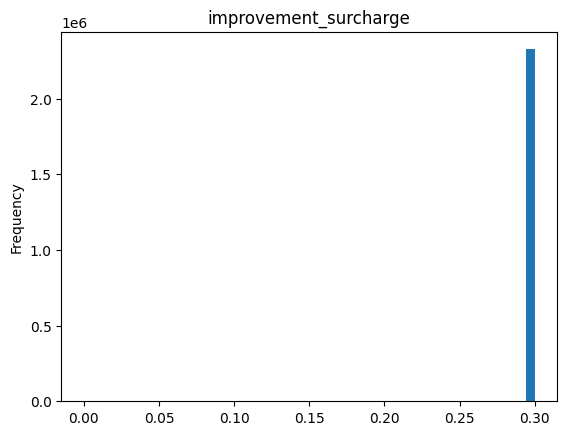

In [19]:
df["improvement_surcharge"].plot(kind="hist", title="improvement_surcharge", xlabel="improvement_surcharge", bins=50)

<AxesSubplot: title={'center': 'total_amount'}, ylabel='Frequency'>

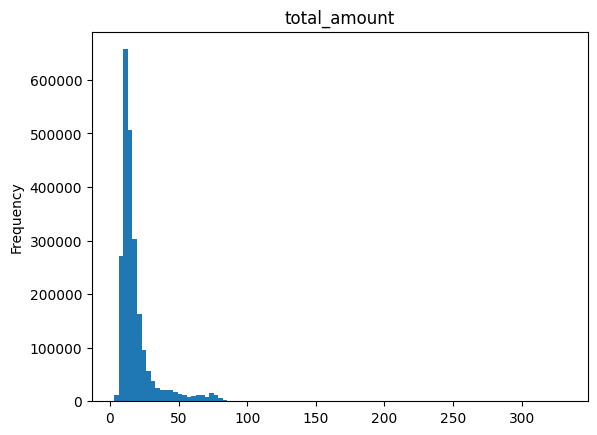

In [20]:
df["total_amount"].plot(kind="hist", title="total_amount", xlabel="total_amount", bins=100)

<AxesSubplot: title={'center': 'congestion_surcharge'}, ylabel='Frequency'>

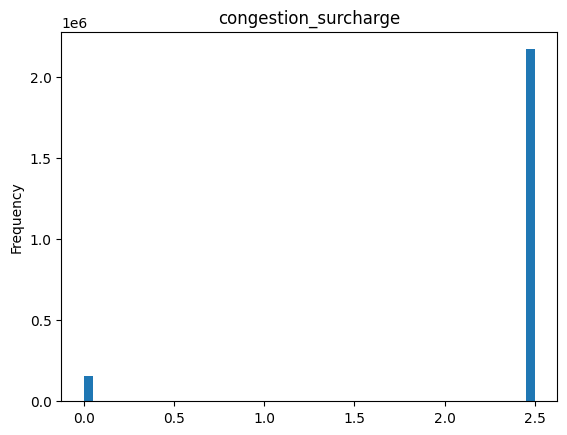

In [21]:
df["congestion_surcharge"].plot(kind="hist", title="congestion_surcharge", xlabel="congestion_surcharge", bins=50)

<AxesSubplot: title={'center': 'airport_fee'}, ylabel='Frequency'>

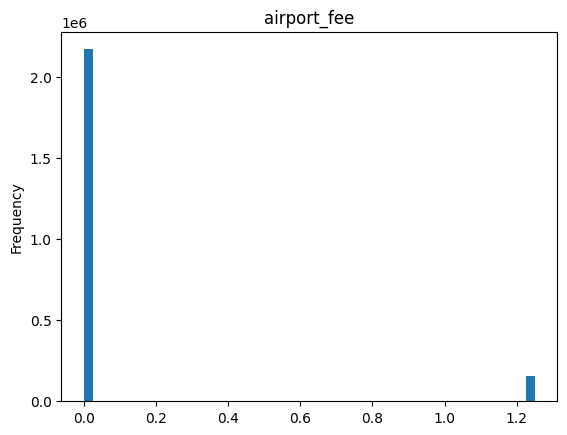

In [22]:
df["airport_fee"].plot(kind="hist", title="airport_fee", xlabel="airport_fee", bins=50)

# Correlation plots

<AxesSubplot: title={'center': 'Distance vs. fare'}, xlabel='Distance', ylabel='Fare'>

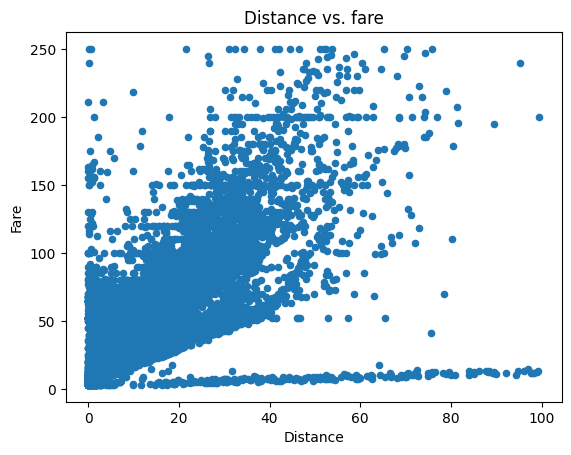

In [23]:
df.plot(kind="scatter", x="trip_distance", y="fare_amount", title="Distance vs. fare", xlabel="Distance", ylabel="Fare")

<AxesSubplot: title={'center': 'Distance vs. total'}, xlabel='Distance', ylabel='Total'>

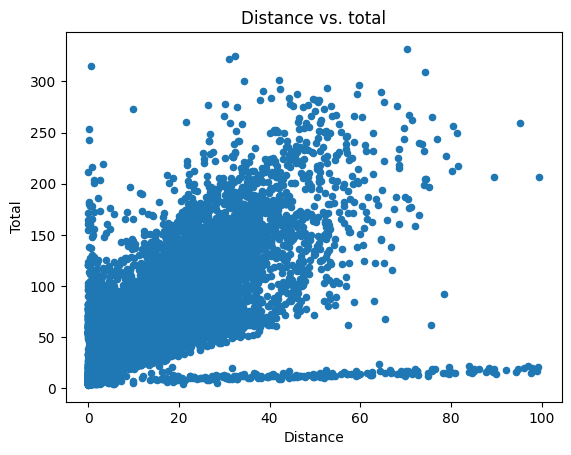

In [24]:
df.plot(kind="scatter", x="trip_distance", y="total_amount", title="Distance vs. total", xlabel="Distance", ylabel="Total")

<AxesSubplot: title={'center': 'Distance vs. duration'}, xlabel='Distance', ylabel='duration'>

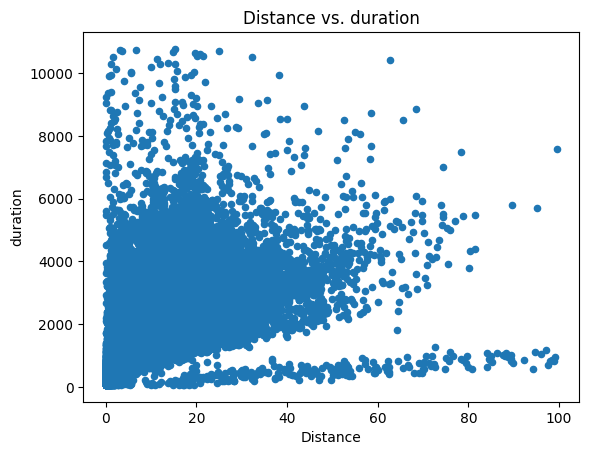

In [25]:
df.plot(kind="scatter", x="trip_distance", y="duration", title="Distance vs. duration", xlabel="Distance", ylabel="duration")

<AxesSubplot: title={'center': 'duration vs. fare'}, xlabel='duration', ylabel='fare'>

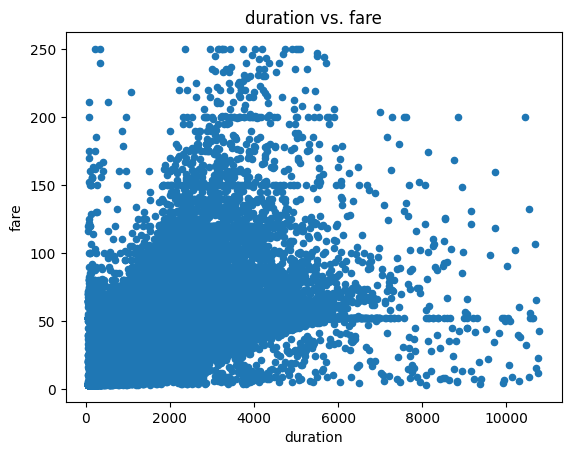

In [26]:
df.plot(kind="scatter", x="duration", y="fare_amount", title="duration vs. fare", xlabel="duration", ylabel="fare")

<AxesSubplot: title={'center': 'duration vs. total'}, xlabel='duration', ylabel='total'>

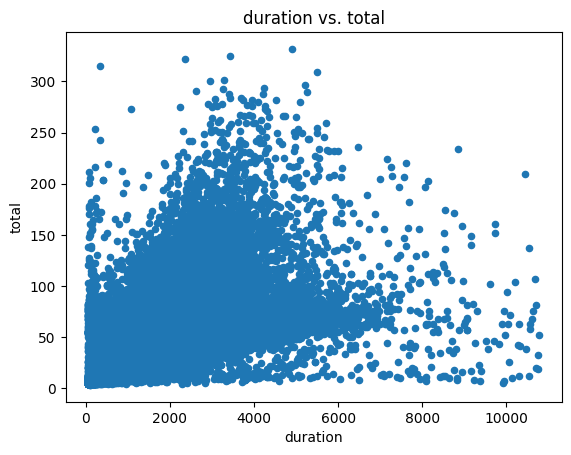

In [27]:
df.plot(kind="scatter", x="duration", y="total_amount", title="duration vs. total", xlabel="duration", ylabel="total")

<AxesSubplot: xlabel='duration', ylabel='total_amount'>

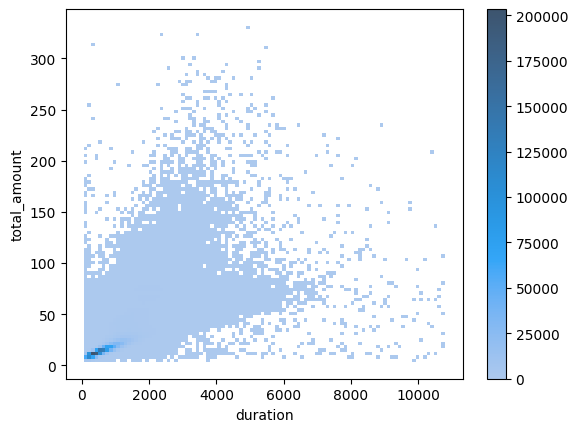

In [28]:
sns.histplot(data=df, x="duration", y="total_amount", cbar=True, bins=100)

<AxesSubplot: xlabel='duration', ylabel='fare_amount'>

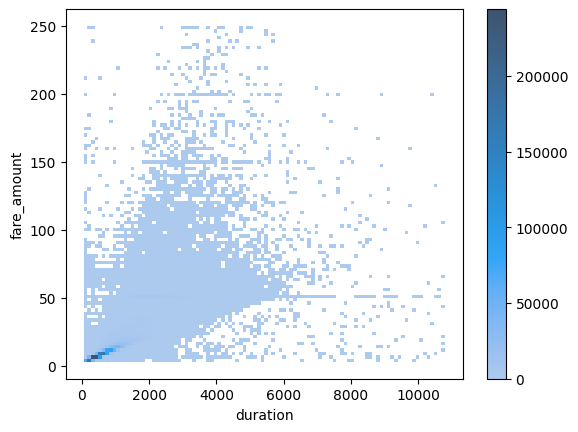

In [29]:
sns.histplot(data=df, x="duration", y="fare_amount", cbar=True, bins=100)

<AxesSubplot: xlabel='duration', ylabel='trip_distance'>

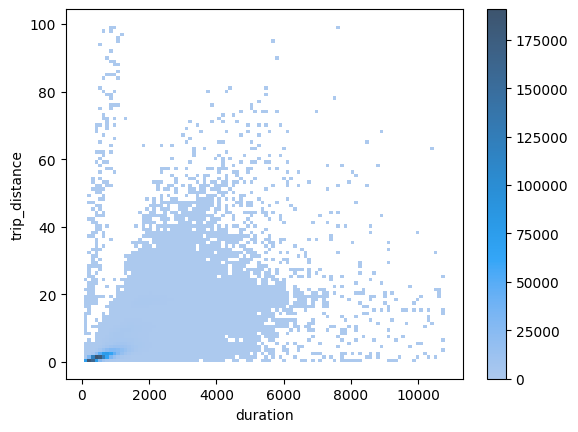

In [30]:
sns.histplot(data=df, x="duration", y="trip_distance", cbar=True, bins=100)

<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

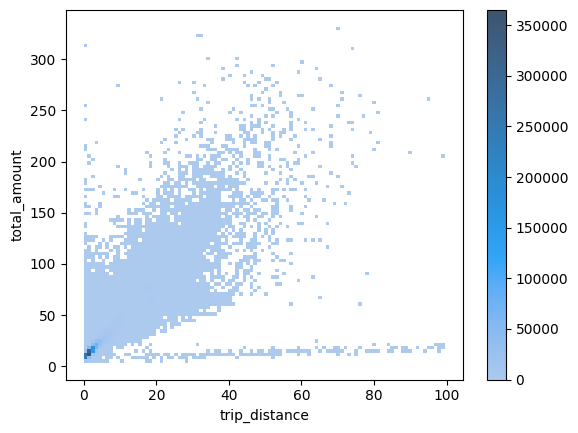

In [31]:
sns.histplot(data=df, x="trip_distance", y="total_amount", cbar=True, bins=100)

<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

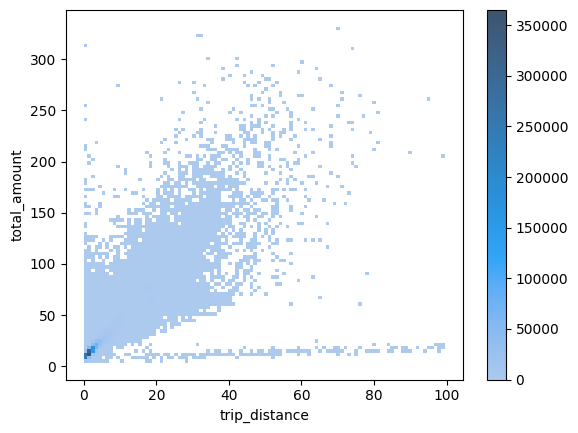

In [32]:
sns.histplot(data=df, x="trip_distance", y="total_amount", cbar=True, bins=100)

# Bar plots

In [37]:
df.columns
focus_features = pd.Series(['trip_distance', 'RatecodeID', 'total_amount', 'duration'])

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_at', 'dropoff_at',
       'duration'],
      dtype='object')

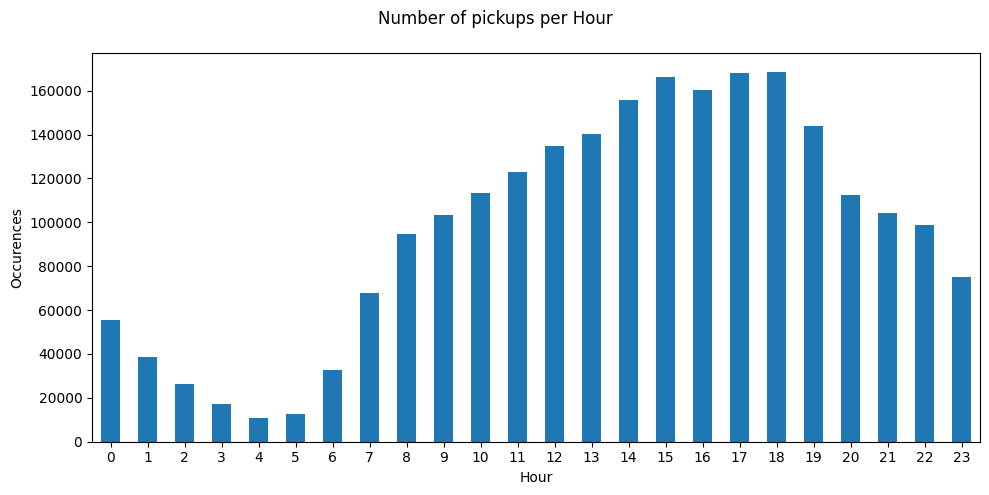

In [33]:
fig = plt.figure(figsize=(10,5))
pickups_per_Hour = df['pickup_at'].dt.hour.value_counts().sort_index()
ax = fig.add_subplot()
pickups_per_Hour.plot(ax=ax, kind='bar', xlabel="Hour", ylabel="Occurences")
ax.tick_params(axis='x', labelrotation = 0)
fig.suptitle('Number of pickups per Hour')
fig.tight_layout(rect=[0, 0, 1, 0.99])

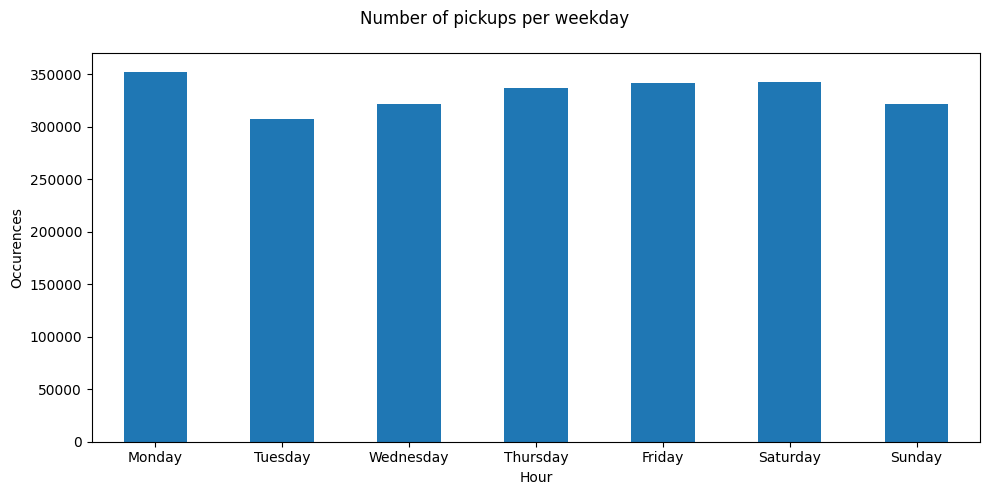

In [90]:
fig = plt.figure(figsize=(10,5))
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pickups_per_weekday = df['pickup_at'].dt.day_name().value_counts().reindex(cats)
ax = fig.add_subplot()
pickups_per_weekday.plot(ax=ax, kind='bar', xlabel="Hour", ylabel="Occurences")
ax.tick_params(axis='x', labelrotation = 0)
fig.suptitle('Number of pickups per weekday')
fig.tight_layout(rect=[0, 0, 1, 0.99])

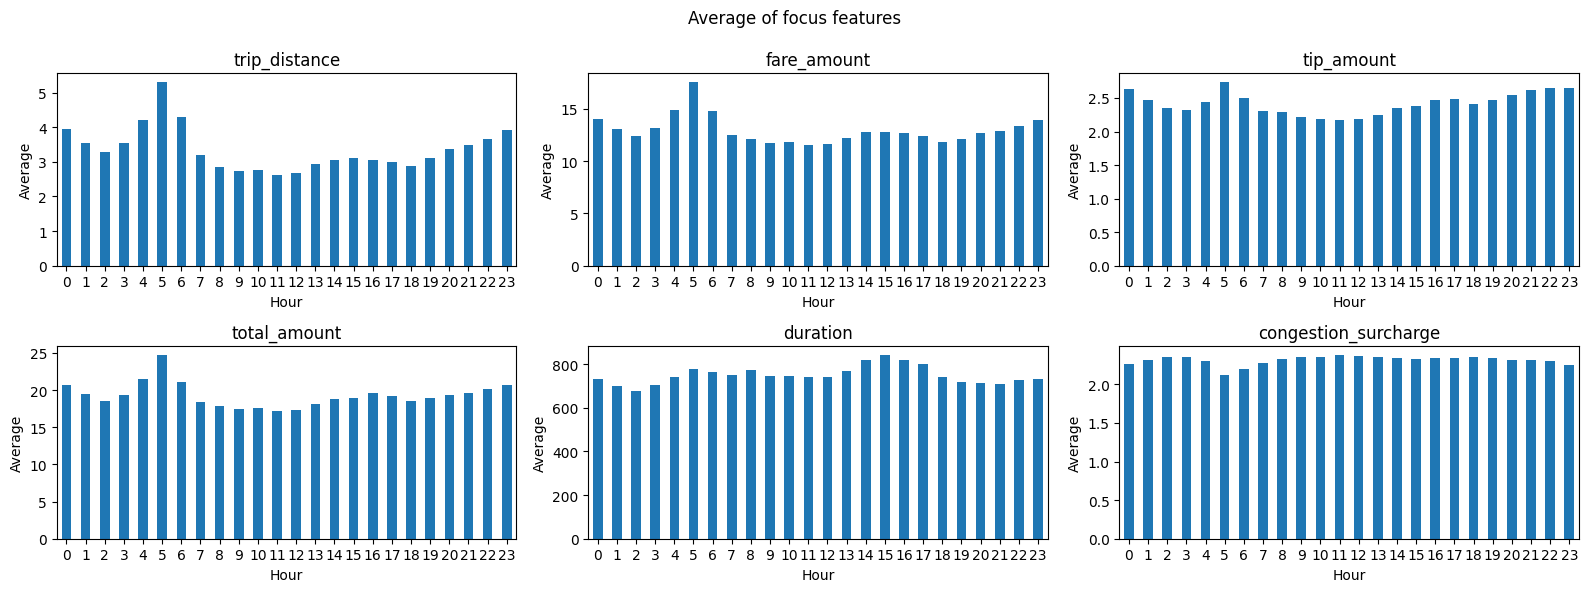

In [72]:
focus_features = pd.Series(['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'duration', 'congestion_surcharge'])

fig = plt.figure(figsize=(16, 6))

for idx, f in enumerate(focus_features):
    df_1 = df.groupby(df['pickup_at'].dt.hour)[f].mean().sort_index()
    ax = fig.add_subplot(2, 3, idx+1)
    df_1.plot(ax=ax, kind='bar', xlabel="Hour", ylabel='Average', title=f, width=0.5)
    ax.tick_params(axis='x', labelrotation = 0)

fig.suptitle('Average of focus features')
fig.tight_layout(rect=[0, 0, 1, 0.99])

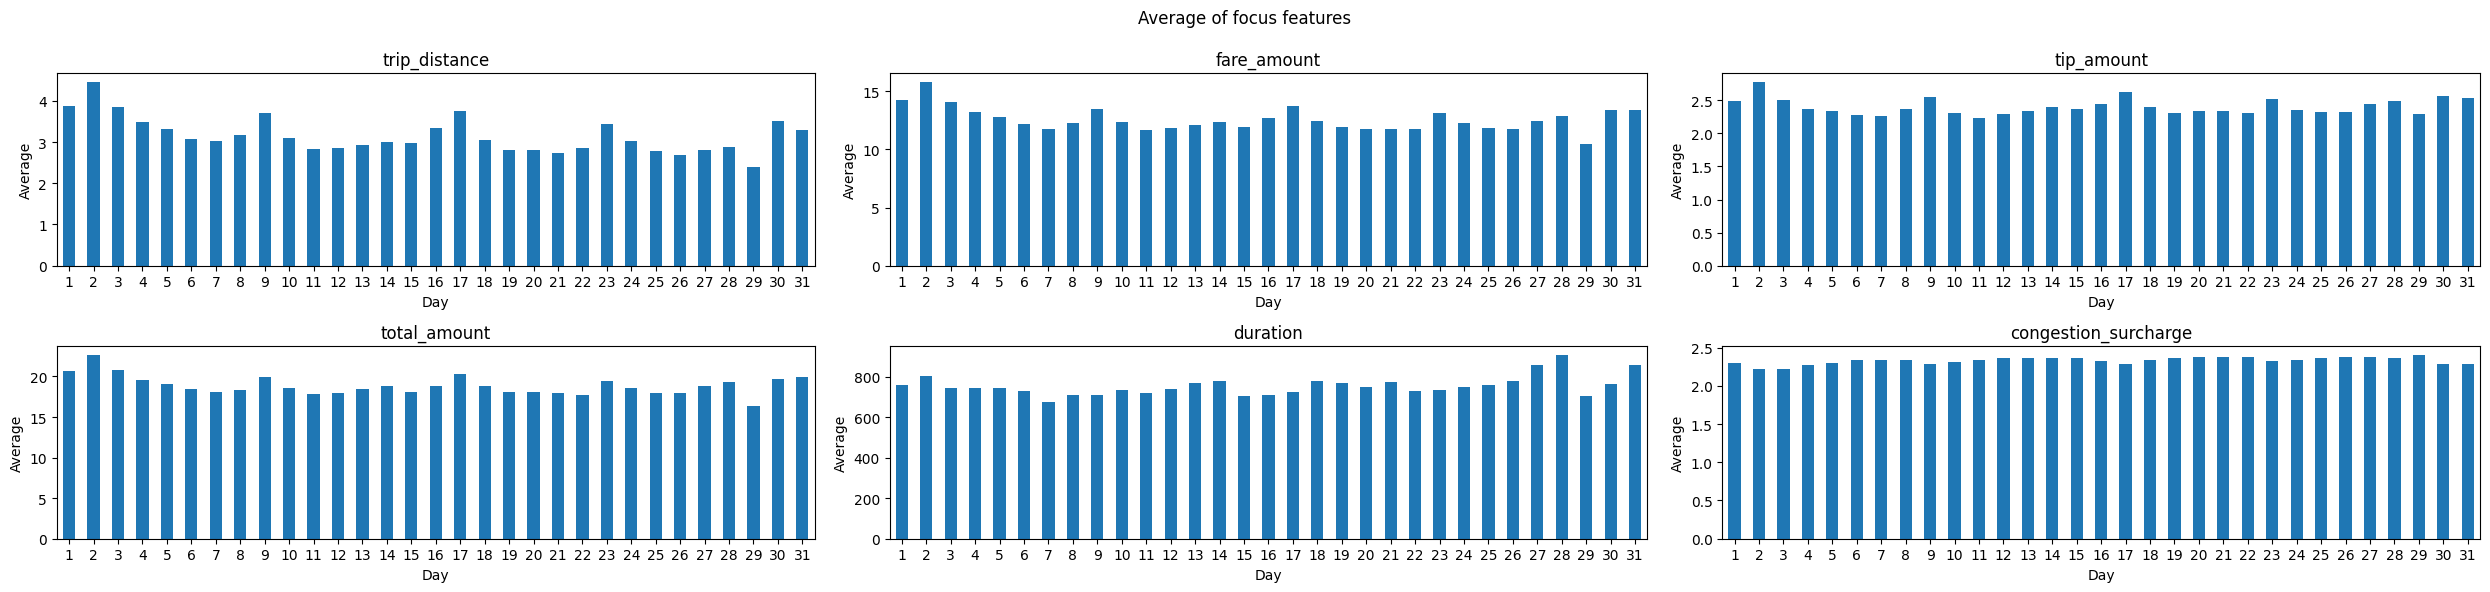

In [84]:
focus_features = pd.Series(['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'duration', 'congestion_surcharge'])

fig = plt.figure(figsize=(25, 6))

for idx, f in enumerate(focus_features):
    df_1 = df.groupby(df['pickup_at'].dt.day)[f].mean().sort_index()
    ax = fig.add_subplot(2, 3, idx+1)
    df_1.plot(ax=ax, kind='bar', xlabel="Day", ylabel='Average', title=f, width=0.5)
    ax.tick_params(axis='x', labelrotation = 0)

fig.suptitle('Average of focus features')
fig.tight_layout(rect=[0, 0, 1, 0.99])

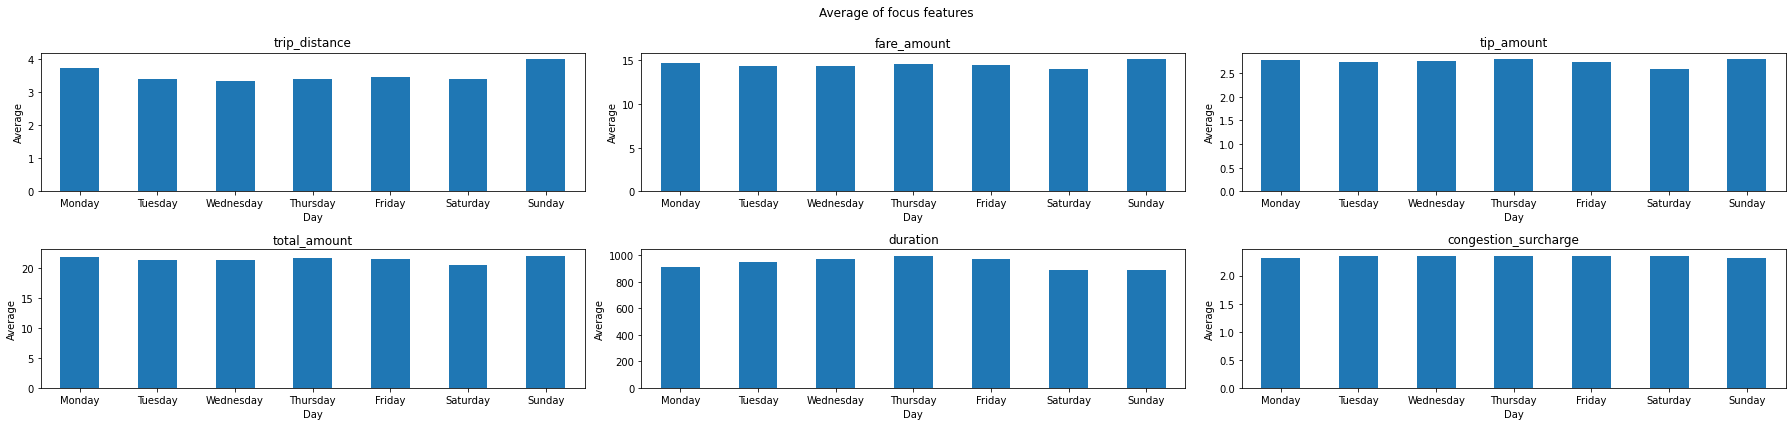

In [16]:
focus_features = pd.Series(['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'duration', 'congestion_surcharge'])
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(25, 6))

for idx, f in enumerate(focus_features):
    df_1 = df.groupby(df['pickup_at'].dt.day_name())[f].mean().reindex(cats)
    ax = fig.add_subplot(2, 3, idx+1)
    df_1.plot(ax=ax, kind='bar', xlabel="Day", ylabel='Average', title=f, width=0.5)
    ax.tick_params(axis='x', labelrotation = 0)

fig.suptitle('Average of focus features')
fig.tight_layout(rect=[0, 0, 1, 0.99])

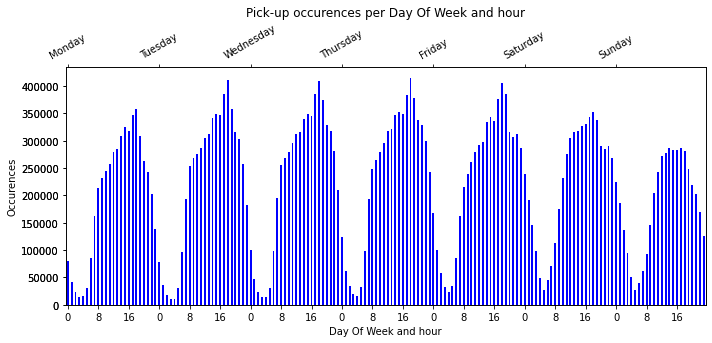

In [15]:
fig = plt.figure(figsize=(10,5))
df["DayOfWeek"] = df['pickup_at'].dt.day_name()

pickups_per_DayOfWeek_and_hour = df.groupby([df['pickup_at'].dt.day_of_week,df['pickup_at'].dt.day_name(),df['pickup_at'].dt.hour])['DayOfWeek'].value_counts()
pickups_per_DayOfWeek_and_hour = pickups_per_DayOfWeek_and_hour.droplevel(0,'index').droplevel(0,'index')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({'text.color': "black",
                    'axes.labelcolor': "black",
                    'axes.edgecolor': "black",
                    'xtick.color': "black",
                    'ytick.color': "black"})
pickups_per_DayOfWeek_and_hour.droplevel(1,'index').plot(ax=ax, kind='bar', title='Pick-up occurences per Day Of Week and hour', xlabel="Day Of Week and hour", ylabel="Occurences", color="black")
ax.locator_params(axis='x', nbins=7*3)
ax.tick_params( axis='x', labelrotation = 0)
ax2 = ax.twiny()
pickups_per_DayOfWeek_and_hour.droplevel(0,'index').plot(ax=ax2, kind='bar', title='', xlabel='', ylabel='', color="blue")
ax2.locator_params(axis='x', nbins=7)
ax2.tick_params( axis='x', labelrotation = 30)
    
fig.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

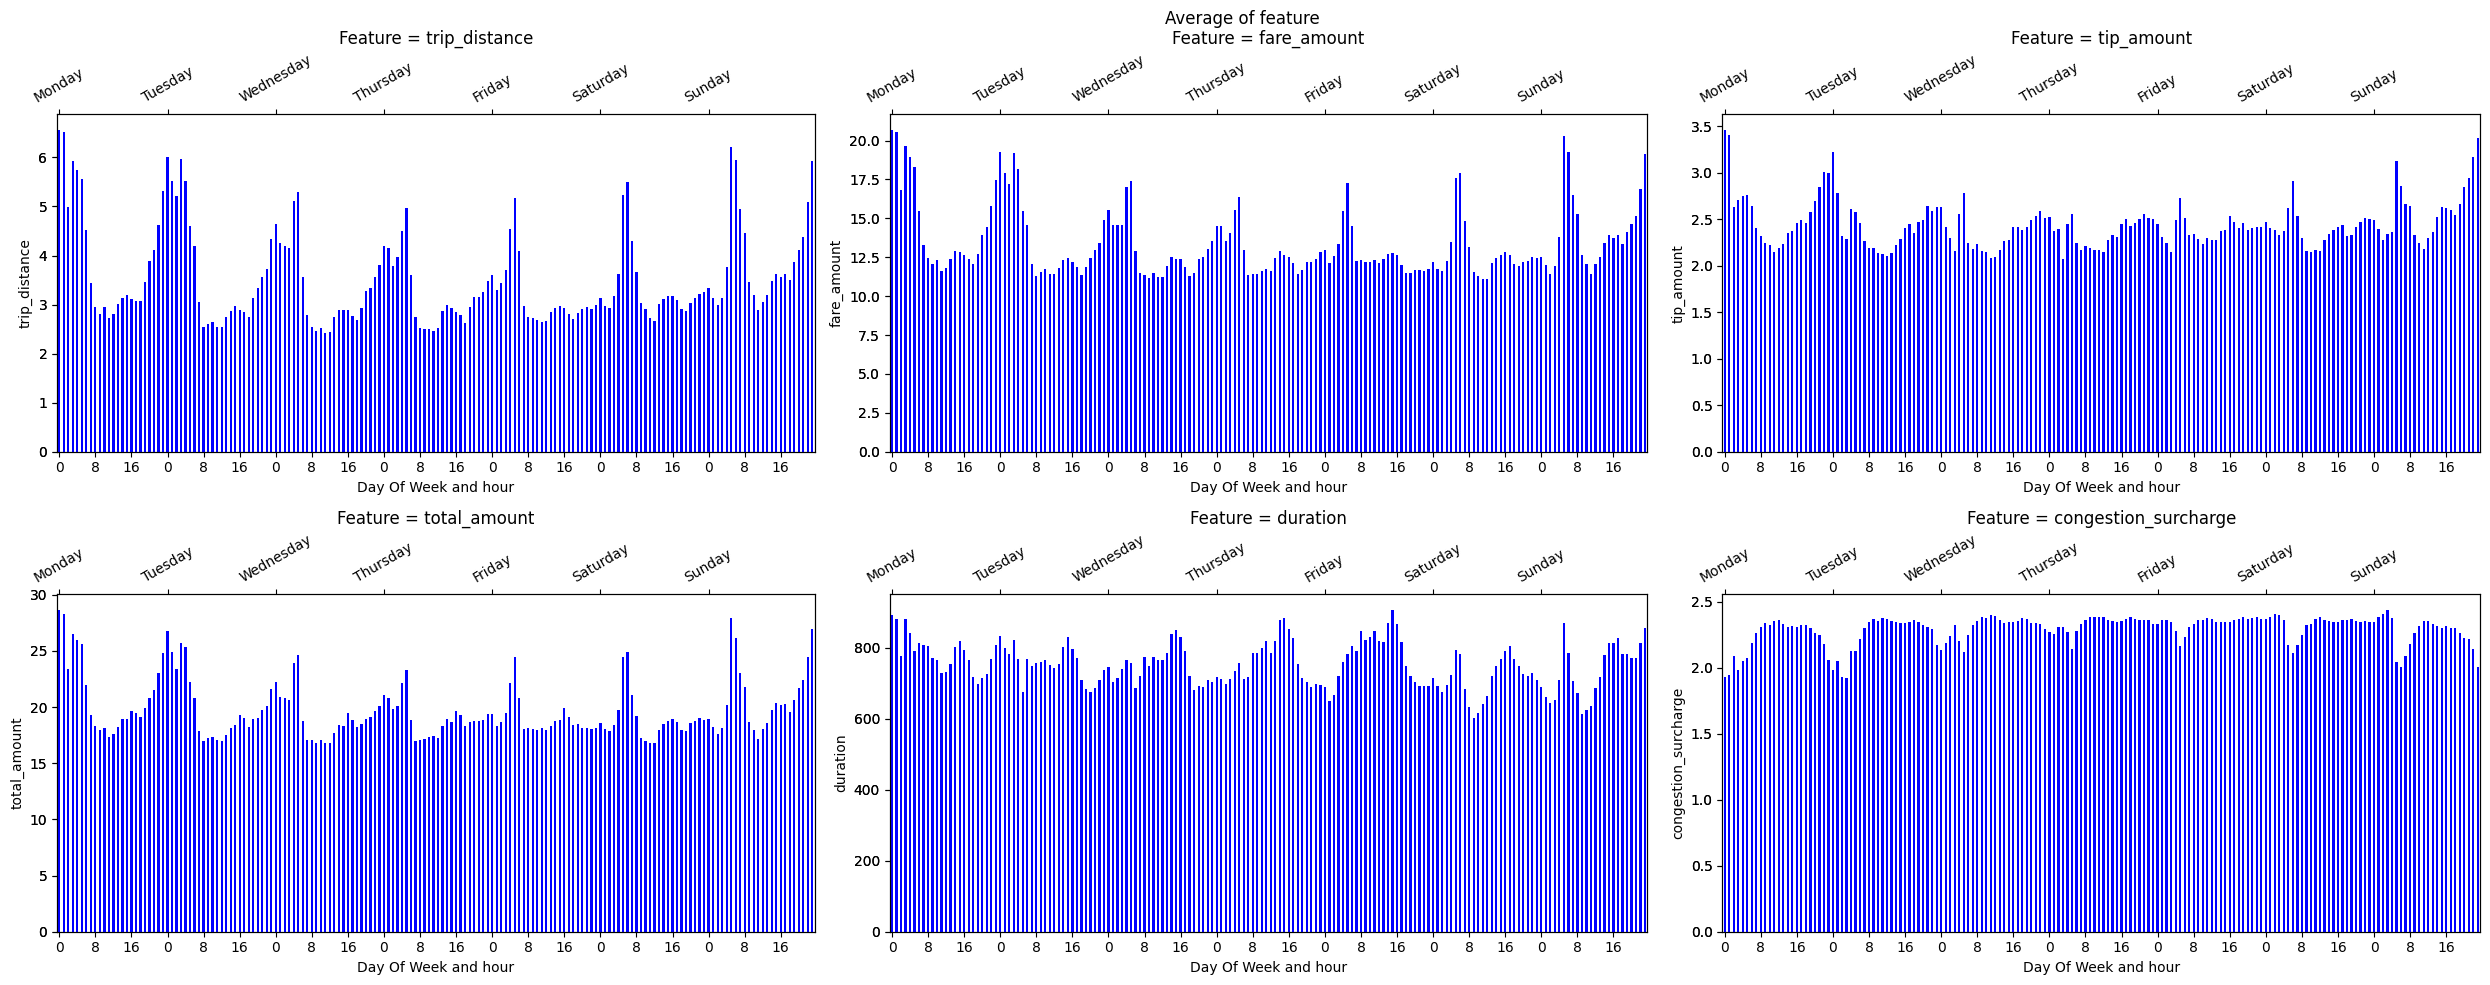

In [112]:

focus_features = pd.Series(['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'duration', 'congestion_surcharge'])

fig = plt.figure(figsize=(25, 10))

for idx, f in enumerate(focus_features):
    mean_focus_features_per_DayOfWeek_and_hour = df.groupby([df['pickup_at'].dt.day_of_week,df['pickup_at'].dt.day_name(),df['pickup_at'].dt.hour])[f].mean()
    #mean_focus_features_per_DayOfWeek_and_hour = mean_focus_features_per_DayOfWeek_and_hour.droplevel(1,'index')
    ax = fig.add_subplot(2, 3, idx+1)
    plt.rcParams.update({'text.color': "black",
                        'axes.labelcolor': "black",
                        'axes.edgecolor': "black",
                        'xtick.color': "black",
                        'ytick.color': "black"})
    mean_focus_features_per_DayOfWeek_and_hour.droplevel(1,'index').droplevel(0,'index').plot(ax=ax, kind='bar', title="Feature = " + f, xlabel="Day Of Week and hour", ylabel= f, color="black")
    ax.locator_params(axis='x', nbins=7*3)
    ax.tick_params( axis='x', labelrotation = 0)
    ax2 = ax.twiny()
    mean_focus_features_per_DayOfWeek_and_hour.droplevel(0,'index').droplevel(1,'index').plot(ax=ax2, kind='bar', title='', xlabel='', ylabel='', color="blue")
    ax2.locator_params(axis='x', nbins=7)
    ax2.tick_params( axis='x', labelrotation = 30)
    
fig.tight_layout(rect=[0, 0, 1, 0.975])
fig.suptitle("Average of feature ")
plt.show()